In [2]:
# import everything I need and everything I don't need

import env
import pandas as pd
import pydataset as data
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire
import wrangle

## Big Question:
### What is leading Telco customers to churn?
### * Find drivers of churn

In [3]:
# Obtain Telco dataset.

telco_df_untouched = acquire.get_telco_data()

### Wrangling Process

After acquiring the Telco dataset, I used a created function called 'prep_telco' to prepare the data for Exploratory Analysis. Steps used to prepare data:

    * Encode the categorical variables
    * Drop unneccesary columns
    * Convert string numbers into integers/floats
    * Split dataset into train, validate, and test

In [4]:
# Call Telco prep function to separate dataset into train, validate, and test

train, validate, test = wrangle.prep_telco(telco_df_untouched)

In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 3968 to 4011
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gender                                  4500 non-null   object 
 1   senior_citizen                          4500 non-null   int64  
 2   partner                                 4500 non-null   object 
 3   dependents                              4500 non-null   object 
 4   tenure                                  4500 non-null   int64  
 5   phone_service                           4500 non-null   object 
 6   multiple_lines                          4500 non-null   object 
 7   online_security                         4500 non-null   object 
 8   online_backup                           4500 non-null   object 
 9   device_protection                       4500 non-null   object 
 10  tech_support                            4500 non-null   o

In [6]:
train

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3968,Male,0,No,No,3,Yes,No,No,No,No,...,1,0,0,0,1,0,0,0,1,0
1147,Female,0,Yes,No,48,Yes,No,No,Yes,Yes,...,0,1,0,1,0,0,0,0,1,0
5957,Female,1,Yes,No,53,Yes,Yes,No internet service,No internet service,No internet service,...,0,0,1,0,0,1,0,1,0,0
1061,Female,0,Yes,No,53,Yes,Yes,Yes,Yes,Yes,...,0,1,0,1,0,0,1,0,0,0
3561,Female,0,Yes,Yes,16,Yes,Yes,Yes,No,Yes,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4766,Male,0,Yes,No,11,Yes,Yes,No,Yes,No,...,1,0,0,0,1,0,1,0,0,0
1903,Female,0,No,No,5,No,No phone service,No,No,Yes,...,1,0,0,1,0,0,0,0,1,0
3012,Male,0,Yes,No,40,Yes,No,No,Yes,Yes,...,0,1,0,0,1,0,0,0,1,0
763,Female,0,No,No,11,Yes,No,No,No,Yes,...,0,1,0,1,0,0,1,0,0,0


### Explore Univariate Data

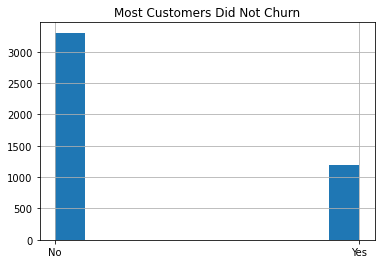

In [5]:
plt.title("Most Customers Did Not Churn")
train.churn.hist()
plt.show()

In [8]:
print("Percent churned from train:",
round(train.churn_encoded.mean(), 3))

Percent churned from train: 0.266


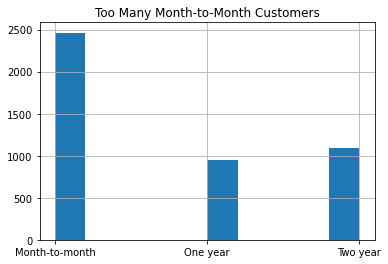

In [7]:
plt.title("Too Many Month-to-Month Customers")
train.contract_type.hist()
plt.show()

## Takeaways & Actions

### * ~74% did not churn and ~26% churned. Predicting "not churned" will be the baseline prediction to test the usefulness of features later.

### * There are many more month-to-month type contracts than any other.

# Exploratory Analysis (Bivariate)

### Is there a relationship between gender and churn?

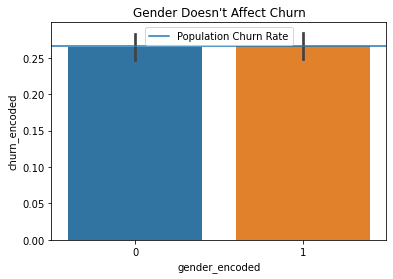

Fail to reject the null
Insufficient evidence to reject the null


In [8]:
plt.title("Gender Doesn't Affect Churn")
sns.barplot(x="gender_encoded", y="churn_encoded", data=train)
population_churn_rate = train.churn_encoded.mean()
plt.axhline(population_churn_rate, label="Population Churn Rate")
plt.legend()
plt.show()

alpha = 0.05

null_hypothesis = "Gender and churn are independent."
alternative_hypothesis = "There is a relationship between gender and churning."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.gender_encoded, train.churn_encoded)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

## Is there a relationship between being single and churning?

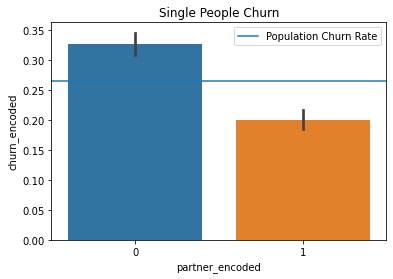

Reject the null hypothesis that Being single and churning are independent.
Sufficient evidence to move forward understanding that There is a relationship between being single and churning.


In [9]:
plt.title("Single People Churn")
sns.barplot(x="partner_encoded", y="churn_encoded", data=train)
population_churn_rate = train.churn_encoded.mean()
plt.axhline(population_churn_rate, label="Population Churn Rate")
plt.legend()
plt.show()


alpha = 0.05

null_hypothesis = "Being single and churning are independent."
alternative_hypothesis = "There is a relationship between being single and churning."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.partner_encoded, train.churn_encoded)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

## Is there a relationship between month-to-month contract and churn?

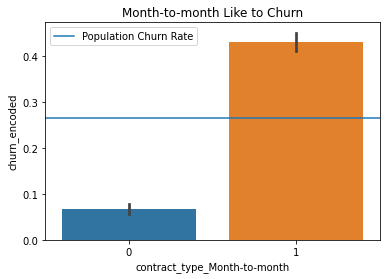

Reject the null hypothesis that Month-to-month contracts and churning are independent.
Sufficient evidence to move forward understanding that There is a relationship between month-to-month contracts and churning.


In [10]:
plt.title("Month-to-month Like to Churn")
sns.barplot(x="contract_type_Month-to-month", y="churn_encoded", data=train)
population_churn_rate = train.churn_encoded.mean()
plt.axhline(population_churn_rate, label="Population Churn Rate")
plt.legend()
plt.show()

alpha = 0.05

null_hypothesis = "Month-to-month contracts and churning are independent."
alternative_hypothesis = "There is a relationship between month-to-month contracts and churning."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.partner_encoded, train.churn_encoded)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

## Takeaways and Actions
* There seems to be no relationship between gender and churning.
* Couples tend to renew contracts.
* Month-to-month customers are more likely to churn.